## Homework 3

**Exercise 3.5**

 The innermost six planets of our solar system revolve around the
Sun in roughly circular orbits that all lie approximately in the same
(ecliptic) plane.  Check your textbook for a table of some basic parameters. 

Using *vpython* functions, create an
animation of the solar system that shows the following:

**a)** The Sun and planets as spheres in their appropriate positions and
  with sizes proportional to their actual sizes.  Because the radii of the
  planets are tiny compared to the distances between them, represent the
  planets by spheres with radii $c_1$ times larger than their correct
  proportionate values, so that you can see them clearly.  Find a good
  value for $c_1$ that makes the planets visible.  You'll also need to find
  a good radius for the Sun.  Choose any value that gives a clear
  visualization.  (It doesn't work to scale the radius of the Sun by the
  same factor you use for the planets, because it'll come out looking much
  too large.  So just use whatever works.)  For added realism, you may also
  want to make your spheres different colors.  For instance, Earth could be
  blue and the Sun could be yellow.
  
  **b)** The motion of the planets as they move around the Sun (by making the
  spheres of the planets move).  In the interests of alleviating boredom,
  construct your program so that time in your animation runs a factor of
  $c_2$ faster than actual time.  Find a good value of $c_2$ that makes the
  motion of the orbits easily visible but not unreasonably fast.  Make use
  of the *rate* function to make your animation run smoothly.
  
  Hint: You may find it useful to store the sphere variables representing the
planets in an array of the kind described on page 115.

In [2]:
"""
Program: ex3.5_visualization_of_the_solar_system
Purpose: Visualize the motion of the inner 6 planets around the Sun to scale
Other information: 
   
* The package is vpython not visual
* Need to use the vpython function vector to specify position
* VPython7 uses function canvas() to set window properties not display()
* canvas() uses keyword 'ambient' to set color of foreground objects, not 'foreground'
* Create a canvas first before running otherwise console and browser tab freeze/hang
* Here I use numpy function rint to convert an array to integers, int function is scalar.


"""

from vpython import sphere,rate, vector, canvas, color
from math import cos,sin,pi
from numpy import empty, array, max, rint, pi


# Set size of display window
xwidth=600
ywidth=500

# Draw blank screen. I need this otherwise console freezes.
canvas(width=xwidth, height=ywidth)

# Scale factor to scale planet radii. This is non-physical but adjusted for visuals
c1 = 2000

# Create an array to hold the sphere objects
planets = empty(6, sphere)

# Colors of planets. The color keyword inside the sphere() requires RGB vector
# In order, white, yellow, blue, red, orange, white
rgb1 = [1,1,0,1,1,1]
rgb2 = [1,1,0,0,0.6,1]
rgb3 = [1,0,1,0,0,1]

# Create array to store initial positions of each planet
x_o = empty([6], int)
y_o = empty([6], int)

# Create array to store radii of each planet, km
R = array([2440,6052,6371,3386,69173,57316], float)

# Create an array to store orbital radii of each planet, km
r = array([57.9e6,108.2e6,149.6e6,227.9e6,778.5e6,1433.4e6], float)

# Create an array to store orbital periods, days
T = array([88.0,224.7,365.3,687.0,4331.6,10759.2], float)
# Calculate angular velocity, rad/day
omega = 2*pi/T

# Determine grid scale based on radius of largest planet orbit
r_max = max(r)
# Set scale so largest orbit spans 90% of windows length
r_scale = 0.9*xwidth/(2*r_max)

# Determine initial position of planets using grid scale. Places planets on right
x_o = 0 + rint(r_scale*r)
y_o[:] = 0  

# Place Sun at center (origin) of window
Sun = sphere(pos=vector(0,0,0),radius=7, color=color.yellow)
# Draw each planet at initial position. Use c1 to scale the planets radii. So plantet scale is different than orbit scale, 
# to visualize
for p in range(0,6):
    planets[p] = sphere(pos=vector(x_o[p], y_o[p], 0), radius=c1*r_scale*R[p], color=vector(rgb1[p], rgb2[p], rgb3[p]))

# Specify the number of earth years to run animation
nyear = 10
# Loop through time, here in unit of days
for t in range (0, nyear*365):
    # Calculate the angular position of each planet using its angular velocity
    theta = omega*t
    for p in range(0,6):
        # Calculate Cartesian coords of each planet and draw at new position
        x = r_scale*r[p]*cos(theta[p])
        y = r_scale*r[p]*sin(theta[p])
        # Pause 1/120 seconds between frames
        rate(120)
        planets[p].pos = vector(x, y, 0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Exercise 4.3**

Suppose we have a function $f(x)$ and we want to
calculate its derivative at a point $x$.  We can do that with pencil and
paper if we know the mathematical form of the function, or we can do it on
the computer by making use of the definition of the derivative:

\begin{equation*}
{ df\over dx} = \lim_{\delta\to0} {f(x+\delta)-f(x)\over\delta}.
\end{equation*}

On the computer we can't actually take the limit as $\delta$ goes to
zero, but we can get a reasonable approximation just by making $\delta$
small.

**a)** Write a program that defines a function _f(x)_ returning the
  value $x(x-1)$, then calculates the derivative of the function at the
  point $x=1$ using the formula above with $\delta=10^{-2}$.  


In [3]:
"""
Program: ex4.3_calculating_derivatives
Purpose: Demonstrates that calculations that produce small differences can have large relative errors. 
Does it work?: Yes
Other information: 
"""
import numpy as np

def function(x):
    f = (x*(x-1))
    return (f)

# Part a: Calculate the derivative at x=1
# Answer =   1.010000000000001
# Analytic answer = 1
  
delta = float(input("Enter delta: "))
x = float(input("Enter x: "))

# Calculate the derivative
f_prime = (function(x+delta)-function(x))/delta

print("The derivative df/dx is: ", f_prime)

The derivative df/dx is:  1.010000000000001


Calculate the true value of the same derivative analytically and compare with the answer your program gives.  The two will not agree perfectly.  Why not?

**Answer**

Analytic derivative = 1  
Numerical deriviative = 1.010000000000001

We're only approximating the derivative using $\delta=10^{-2}$, not allowing it to go to zero. 

**b)** Repeat the calculation for $\delta=10^{-4}$, $10^{-6}$, $10^{-8}$,
  $10^{-10}$, $10^{-12}$, and $10^{-14}$.  Have your program output the derivative for each. You should see that the accuracy
  of the calculation initially gets better as $\delta$ gets smaller, but
  then gets worse again.  Why is this?

In [ ]:
# Calculate the derivative for different values of delta
delta = np.array([1e-4,1e-6,1e-8, 1e-10, 1e-12, 1e-14])
f_prime = (function(x+delta)-function(x))/delta

print("delta = {} {} {} {} {} {}".format(*delta))
print("df/dx is = {} {} {} {} {} {}".format(*f_prime))

 



delta = 0.0001 1e-06 1e-08 1e-10 1e-12 1e-14
df/dx is = 1.0000999999998899 1.0000009999177333 1.0000000039225287 1.000000082840371 1.0000889005833413 0.9992007221626509


 
|delta|f'(1)|
|:----|-----:|
|1e-4|     1.0000999999998899|
|1e-6|     1.000000999917733|
|1e-8|     1.0000000039225287| 
|1e-10|    1.000000082840371|
|1e-12|    1.0000889005833413|
|1e-14|    0.9992007221626509|


 We see that accuracy actually decreases after delta=1e-8 This is because
 in the calculation of the derivative we calculate the difference
 x+delta - 1. When x=1, x+delta ~ 1 so the difference is small. 
 This means the relative error on the difference grows as delta --> 0. The most accurate results is achieved at when $\delta=10^{-8}$, which is not a coincidence. $10^{-8}$ is the square root of the machine precision or error constant. 

**Exercise 4.4**

Suppose we want to calculate the value of the integral

$$
I = \int_{-1}^1 \sqrt{1-x^2} \, dx.
$$

Check your textbook for a visualization of what the integrand looks like.

Alternatively, we can evaluate the integral on the computer by dividing the domain of integration into a large number \(N\) of slices of width \(h = \frac{2}{N}\) each, and then using the Riemann definition of the integral:

$$
I = \lim_{N \to \infty} \sum_{k=1}^N h y_k,
$$

where

$$
y_k = \sqrt{1 - x_k^2}\qquad\text{and}\qquad x_k = -1 + h k.
$$

We cannot in practice take the limit \(N \to \infty\), but we can make a reasonable approximation by just making \(N\) large.

**a)** Write a program to evaluate the integral above with \(N=100\) and compare the result with the exact value. The two will not agree very well, because \(N=100\) is not a sufficiently large number of slices.


In [ ]:
"""
Program: ex4.4_calculating_integrals
Purpose: Use the Riemann definition of the integral to evaluate an integral. 
Does it work?: Yes
Other information: 
    
"""

from math import sqrt, pi

# Part a
# N=100, I = 1.5691342555492505
# N = 1000, I = 1.570743738501071
# N = 1e6, I = 1.5707963251317274
# N = 2e6, 1.5707963262069677  takes about 1 second

trueI =  pi/2 # 1.57079632679 (from text)

N = int(2e6)
h = 2/N
I = 0

# calculate the summation
for k in range(N):
    x_k = -1 + h*k
    y_k = sqrt(1-x_k**2)
    I += h*y_k


print ("Integral = {} rel error={:.3e}% ".format(I,100*(trueI-I)/trueI))  

Integral = 1.5707963262069677 rel error=3.743e-08% 


Using N=100, integral is 1.5691342555492505.
The relative error is: 0.11%

**b)** Increase the value of $N$ to get a more accurate value for the
  integral.  If we require that the program runs in about one second or
  less, how accurate a value can you get?

Using N=2e6 takes about 1 second on my computer.   
The integral = 1.5707963262069677.  
The relative error is 3.743e-08%.

**Exercise 5.3**

Consider the integral

\begin{equation*}
E(x) = \int_0^x e^{-t^2} \>d t.
\end{equation*}

**a)** Write a program to calculate $E(x)$ for values of $x$ from 0 to 3 in
  steps of 0.1.  Choose for yourself what method you will use for
  performing the integral and a suitable number of slices.

In [ ]:
"""
Program: ex5.3_simpsons_rule_II
Purpose: Calcluate and Plot the Gaussian error function by integrateing exp(-t^2) 
Does it work?: Yes
Other information: 
    
    The problem says to use either the trapezoidal or Simpson's rule. Here I use SR.
    
"""


from numpy import arange, exp


# define function to return integrand
def f(t):
    return exp(-t**2)

# define function to estimate the integral using Simpson's rule
def simpsonsI(b,N):
    a = 0
    h = (b-a)/N
    I = (f(a) + f(b))

    for k in range(1, N, 2):
        I += 4*f(a+k*h)
    
    for k in range(2, N, 2):
        I += 2*f(a+k*h)

    return (1/3)*h*I
    
# Set the number of slices
N = int(1000)

#create a series from 0, 3 in steps of 0.1
xvalues = arange(0, 3.1, 0.1)

# calculate E(x) for each x in xvalues using Simpson's Rule
E = simpsonsI(xvalues, N)

# print out a sample of 10 values
for i in range(10):
    print("x={:.2f} E={:.3f}".format(xvalues[i], E[i]))

x=0.00 E=0.000
x=0.10 E=0.100
x=0.20 E=0.197
x=0.30 E=0.291
x=0.40 E=0.380
x=0.50 E=0.461
x=0.60 E=0.535
x=0.70 E=0.601
x=0.80 E=0.658
x=0.90 E=0.706


**b)** When you are convinced your program is working, extend it further to
  make a graph of $E(x)$ as a function of $x$.  If you want to remind
  yourself of how to make a graph, you should consult Section 3.1, starting
  on page 88.

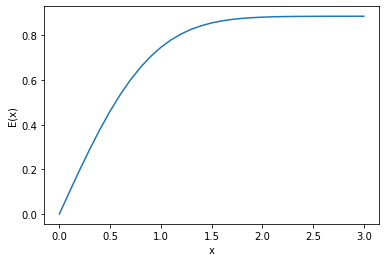

In [ ]:
#Plot E(x) vs x

import matplotlib.pyplot as plt

plt.plot(xvalues, E)
plt.xlabel("x")
plt.ylabel("E(x)")
plt.show()

**Exercise 5.4**

Our ability to resolve detail in astronomical observations is
limited by the diffraction of light in our telescopes.  Light from stars
can be treated effectively as coming from a point source at infinity.  When
such light, with wavelength $\lambda$, passes through the circular aperture
of a telescope (which we'll assume to have unit radius) and is focused by
the telescope in the focal plane, it produces not a single dot, but a
circular diffraction pattern consisting of central spot surrounded by a
series of concentric rings.  The intensity of the light in this diffraction
pattern is given by

\begin{equation*}
I(r) = \biggl( {J_1(kr)\over kr} \biggr)^2,
\end{equation*}

where $r$ is the distance in the focal plane from the center of the
diffraction pattern, $k=2\pi/\lambda$, and $J_1(x)$ is a Bessel function.
The Bessel functions $J_m(x)$ are given by

\begin{equation*}
J_m(x) = {1\over\pi} \int_0^\pi \cos(m\theta - x\sin\theta) \>d\theta,
\end{equation*}

where $m$ is a nonnegative integer and $x\ge0$.

**a)** Write a Python function _J(m,x)_ that calculates the value of
  $J_m(x)$ using Simpson's rule with $N=1000$ points.  Use your
  function in a program to make a plot, on a single graph, of the Bessel
  functions $J_0$, $J_1$, and $J_2$ as a function of $x$ from $x=0$ to
  $x=20$.

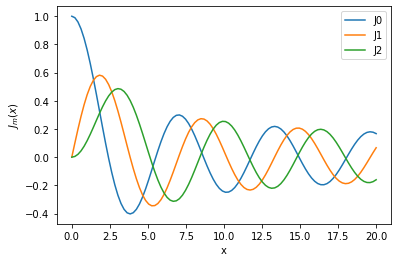

In [ ]:
"""

Program: ex5.4_diffraction_limit_of_a_telescope
Purpose: Use Simpson's Rule to evaluate the Bessel function and graph the diffraction pattern of telescope
Does it work?: Yes
Other information: 
    
"""


import numpy as np
import matplotlib.pyplot as plt
from math import pi

# define function to calculate integrand of Bessel function Jm(x)
def f(m,x, theta):
    return np.cos(m*theta-x*np.sin(theta))

# Define function to calculate the mth Bessel function
# Function uses Simpson's rule to evaluate the integral
def J(m,x):
    # limits of integration
    a = 0
    b = pi
    
    # number of slices
    N = int(1000)
    # slice width
    h = (b-a)/N
    
    #Initialize the estimate I at end points
    I = (f(m,x,a) + f(m,x,b))

    # Sum up odd and even slices 
    for k in range(1, N, 2):
        I += 4*f(m,x, a+k*h)
    
    for k in range(2, N, 2):
        I += 2*f(m, x, a+k*h)

    # Multiply the sum by the prefactor
    I = (1/3)*h*I
    
    # return the Bessel function
    return  (1/pi)*I
    
# xvalues to plot
x = np.linspace(0,20,100)

# calculate J0 Bessel function
m = 0
J0 = J(m,x)

# calculate J1 Bessel function
m = 1
J1 = J(m,x)

# calculate J2 Bessel function
m = 2
J2 = J(m,x)
    
# plot J0, J1, J2 on same plot
plt.plot(x,J0, label="J0")
plt.plot(x,J1, label="J1")
plt.plot(x,J2, label="J2")
plt.legend()
plt.xlabel("x")
plt.ylabel(r"$J_m(x)$")
plt.show()

**b)** Make a second program that makes a density plot of the intensity of the circular diffraction pattern of a point light source with

$$
\lambda=500\,nm
$$

in a square region of the focal plane, using the formula given above. Your picture should cover values of \(r\) from zero up to about \(1\,\mu m\).


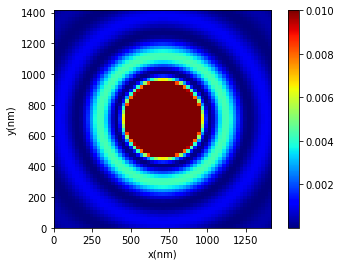

In [ ]:
# Part b
# Create a density plot of diffraction pattern for a specified wavelength

# wavelength, nm (can't name variable lambda since that is a reserved word)
l = 500.

# calculate wave number, nm-1
k = 2*pi/l

# set r_max, the maximum radial extent of diffraction pattern, nm
r_max = 1e3

# calculate the radius at sides of square focal plane, nm
r_sq = np.sqrt(r_max*r_max/2)

# set the number of focal plane pixels on either side of center, assume square
Nhalf = 30

# calculate total pixels along one dimension
Npix = 2*Nhalf + 1

# calculate the width of a pixel, nm/pixel
pixwidth = 2*r_sq/Npix

# create an Npix X Npix array to hold the diffraction pattern
diffraction = np.zeros([Npix,Npix], float)


# loop over the x and y dimensions of focal plane to calculate the diffraction intensity
for i in range(-Nhalf, Nhalf + 1):
    for j in range(-Nhalf, Nhalf + 1):
        # convert i,j indices to physical distances
        x = i*pixwidth
        y = j*pixwidth
        # calculate distance to center
        r = np.sqrt(x**2 + y**2)
        
        kr = k*r
        if (kr ==0):
            diffraction[j+Nhalf,i+Nhalf] = 1/4
        else:
            diffraction[j+Nhalf,i+Nhalf] = (J(1.,kr)/kr)**2
        
            
plt.jet()
# use keyword vmax so lower intensity fringes are visible
plt.imshow(diffraction, vmax=0.01, extent=[0,Npix*pixwidth,0,Npix*pixwidth])
#plt.imshow(diffraction)
plt.xlabel("x(nm)")
plt.ylabel("y(nm)")
plt.colorbar()
plt.show()

**Exercise 5.6**

a) Write a program, or modify an earlier one, to once more calculate
the value of the integral $\int_0^2 (x^4 - 2x + 1) \>d x$ from
Example (5.28), using the trapezoidal rule with $20$ slices, but this time
have the program also print an estimate of the error on the result,
calculated using the method of Eq. (5.28).  To do this you will need to
evaluate the integral twice, once with $N_1=10$ slices and then again with
$N_2=20$ slices.  Then Eq. (5.28) gives the error.  How does the error
calculated in this manner compare with a direct computation of the error as
the difference between your value for the integral and the true value
of 4.4?  Why do the two not agree perfectly?

In [ ]:
"""
Program: ex5.6_error_on_trapezoidal_rule
Purpose: Calculate the approximation error on the TR using "practical" method, eq 5.28
Does it work?: Yes
Other information: 
    
N1=10, I1=4.50656
N2 = 20, I2 = 4.426660000000001
error = 0.026633333333333137

The error calculated using the Euler-Maclaurin method is 0.02. 
"""

# define function to calculate integrand
def f(x):
    return(x**4 -2*x +1)

# set integration interval
a = 0
b = 2

# First estimate the integral using N1 slices
N1 = int(10)
h = (b-a)/N1

I1 = 0

#Calculate summation in trapezoidal rule
# this loops from k=1, N-1
for k in range(1,N1):
    I1 += f(a+k*h)

# add the endpoints and multiply by h
I1 = h*(0.5*f(a) + 0.5*f(b) +I1)

# Next estimate the integral using twice the number of slices
N2 = 2*N1
h = (b-a)/N2

# initialize I2
I2 = 0
for k in range(1,N2):
    I2 += f(a+k*h)

    # add the endpoints and multiply by h    
I2 = h*(0.5*f(a) + 0.5*f(b) +I2)

# Next calculate the approximation error using N2 using eq (5.28)
err = abs ((1/3)*(I2-I1))

print("I1={}, I2={}".format(I1, I2))
print("Error from eq5.28={}".format(err))
print("true error = {}".format(abs(4.4-I2)))
print("Error calculated using eq5.28 is not exact as it neglects higher order error terms")

I1=4.50656, I2=4.426660000000001
Error from eq5.28=0.026633333333333137
true error = 0.026660000000000572
Error calculated using eq5.28 is not exact as it neglects higher order error terms


N = 10: I1 = 4.50656  
N = 20: I2 = 4.426660000000001  
Error calculated from Eq (5.28) = 0.0266333  
Since the true integral is 4.4, the true error of I2 = 0.0266600  
The error calculated using Eq. (5.28) is not exact since it neglects higher order error terms.  